### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading Dataset

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


### Exploring the data

In [4]:
df.shape

(119390, 33)

In [5]:
df.columns

Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.describe()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [8]:
df.isnull().sum()

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

### Data Cleaning

In [9]:
df.drop(['company','adr'],axis=1,inplace=True)

In [10]:
df.head(1)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,C,3,No Deposit,NaN,0,Transient,0,0,Check-Out,01-07-15


In [11]:
df.dropna(subset=['country'],inplace=True)

### Transforming

In [12]:
df["children"].fillna(0,inplace=True)

In [13]:
df["agent"].fillna(0, inplace=True)

In [14]:
df.isnull().sum()

index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces 

In [15]:
df.rename(columns = {'arrival_date_day_of_month':'arrival_date_day','previous_bookings_not_canceled':'previous_bookings'}, inplace = True) 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        118902 non-null  int64  
 1   hotel                        118902 non-null  object 
 2   is_canceled                  118902 non-null  int64  
 3   lead_time                    118902 non-null  int64  
 4   arrival_date_year            118902 non-null  int64  
 5   arrival_date_month           118902 non-null  object 
 6   arrival_date_week_number     118902 non-null  int64  
 7   arrival_date_day             118902 non-null  int64  
 8   stays_in_weekend_nights      118902 non-null  int64  
 9   stays_in_week_nights         118902 non-null  int64  
 10  adults                       118902 non-null  int64  
 11  children                     118902 non-null  float64
 12  babies                       118902 non-null  int64  
 13 

### Analysing the data

The average lead time for reservations is: 104.30802677835528 days


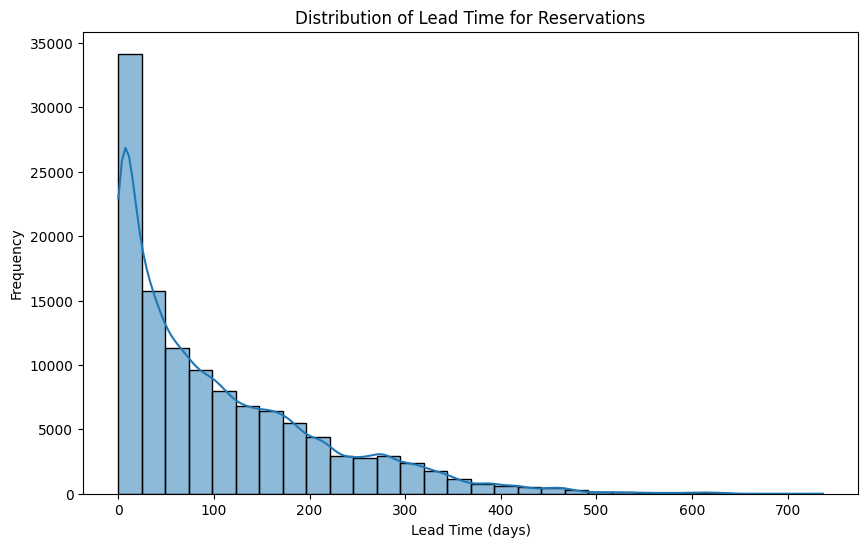

In [17]:
# 1. Average Lead Time for Reservations
average_lead_time = df['lead_time'].mean()
print(f"The average lead time for reservations is: {average_lead_time} days")

# Histogram for Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time for Reservations')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

The country with the most reservations is: PRT


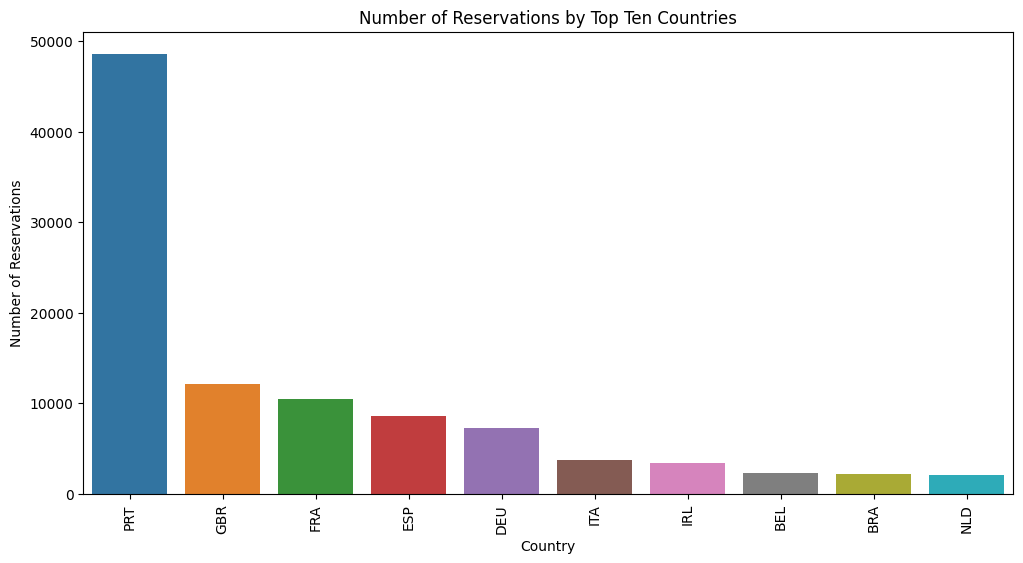

In [18]:
# 2. Country with the Highest Number of Reservations
most_reservations_country = df['country'].value_counts().idxmax()
print(f"The country with the most reservations is: {most_reservations_country}")

# Get the top ten countries
top_countries = df['country'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top five countries
df_top_countries = df[df['country'].isin(top_countries)]

# Bar plot for Top Five Countries with Most Reservations
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df_top_countries, order=top_countries)
plt.title('Number of Reservations by Top Ten Countries')
plt.xlabel('Country')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=90)
plt.show()

The percentage of canceled reservations is: 37.14%


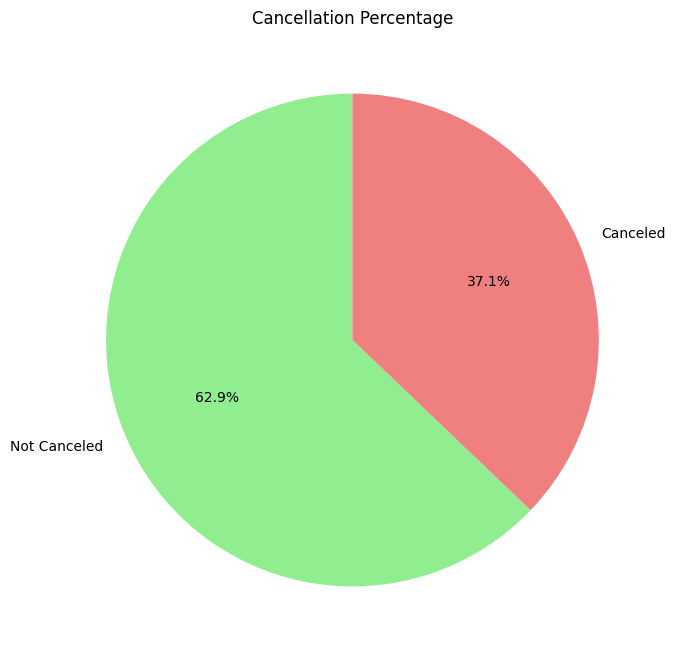

In [19]:
# 3. Percentage of Canceled Reservations
cancellation_percentage = (df['is_canceled'].sum() / df['is_canceled'].count()) * 100
print(f"The percentage of canceled reservations is: {cancellation_percentage:.2f}%")
# Pie chart for Cancellation Percentage
plt.figure(figsize=(8, 8))
labels = ['Not Canceled', 'Canceled']
sizes = [df['is_canceled'].value_counts()[0], df['is_canceled'].value_counts()[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Cancellation Percentage')
plt.show()

The most common room type assigned to guests is: A


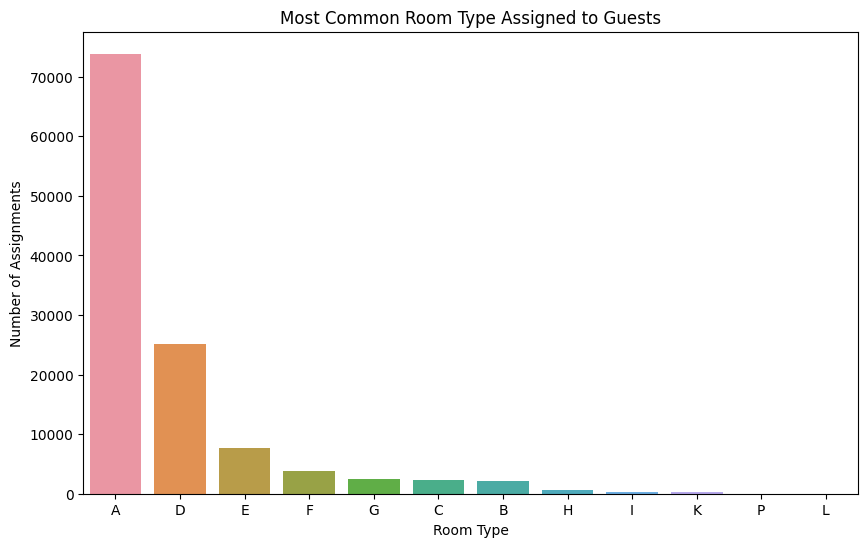

In [20]:
# 4. Most Common Room Type Assigned to Guests
most_common_room_type = df['assigned_room_type'].value_counts().idxmax()
print(f"The most common room type assigned to guests is: {most_common_room_type}")

# Bar plot for Most Common Room Type
plt.figure(figsize=(10, 6))
sns.countplot(x='assigned_room_type', data=df, order=df['assigned_room_type'].value_counts().index)
plt.title('Most Common Room Type Assigned to Guests')
plt.xlabel('Room Type')
plt.ylabel('Number of Assignments')
plt.show()

The average number of special requests per reservation is: 0.57


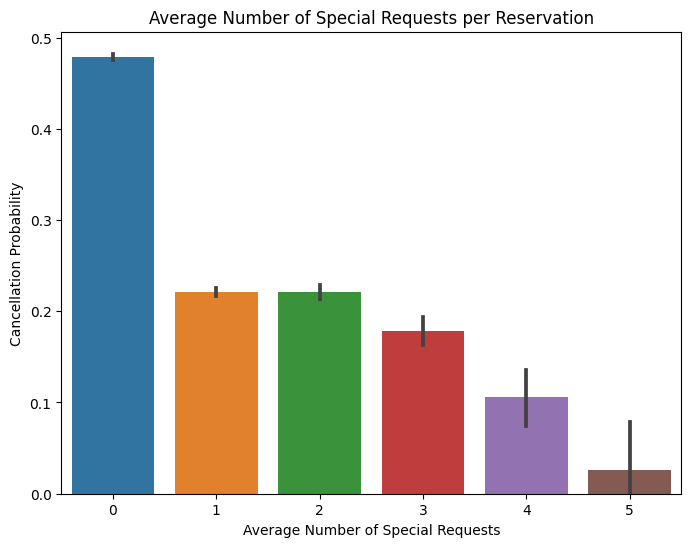

In [21]:
# 5. Average Number of Special Requests per Reservation
average_special_requests = df['total_of_special_requests'].mean()
print(f"The average number of special requests per reservation is: {average_special_requests:.2f}")

# Bar plot for Average Number of Special Requests
plt.figure(figsize=(8, 6))
sns.barplot(x='total_of_special_requests', y='is_canceled', data=df)
plt.title('Average Number of Special Requests per Reservation')
plt.xlabel('Average Number of Special Requests')
plt.ylabel('Cancellation Probability')
plt.show()

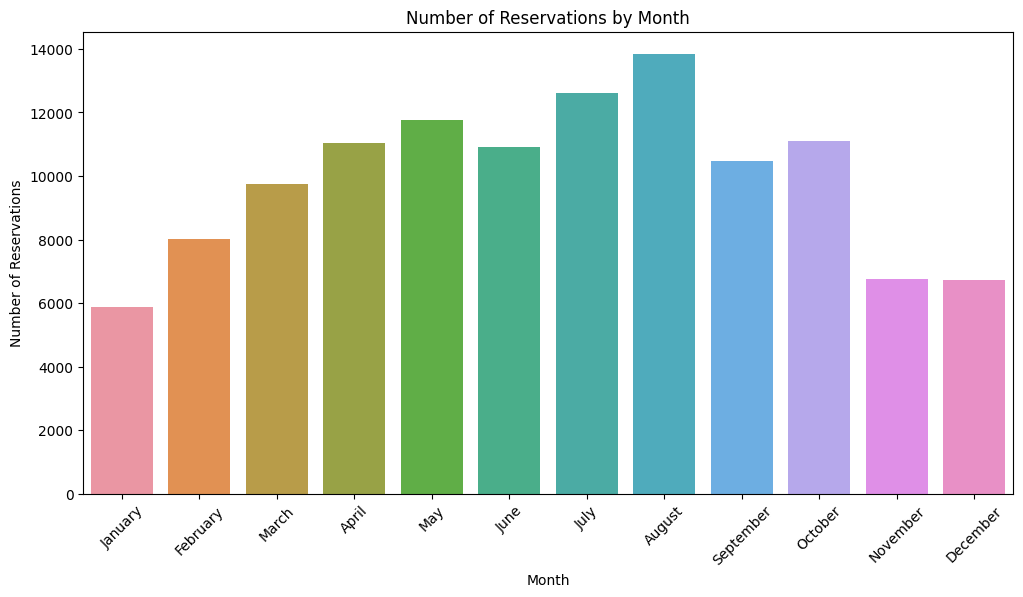

In [22]:
# 6. Which month experiences the highest number of reservations, and is there a seasonal pattern? 
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert the 'arrival_date_month' column to a categorical type with the specified order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Group by month and count the number of reservations
monthly_reservations = df.groupby('arrival_date_month')['index'].count().reset_index()

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='arrival_date_month', y='index', data=monthly_reservations, order=month_order)
plt.title('Number of Reservations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.show()
